In [229]:
# https://studymachinelearning.com/content-based-recommendation-system/
import pandas as pd

# Pegadinha do mundo real 1.
# https://stackoverflow.com/questions/43217916/pandas-data-precision
pd.set_option('display.precision', 10)

houses_df = pd.read_csv('kc_house_data.csv', usecols=['zipcode','yr_built','price', 'bedrooms', 'bathrooms', 'condition', 'sqft_living'])

houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21614 entries, 0 to 21613
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21614 non-null  int64  
 2   bathrooms    21614 non-null  float64
 3   sqft_living  21614 non-null  int64  
 4   condition    21614 non-null  int64  
 5   yr_built     21614 non-null  int64  
 6   zipcode      21614 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


In [230]:
houses_df.head()

,price,bedrooms,bathrooms,sqft_living,condition,yr_built,zipcode
0,221900.0,3,1.00,1180,3,1955,98178
1,221900.0,3,1.00,1180,3,1955,98178
2,NaN,3,2.25,2570,3,1951,98125
3,180000.0,2,1.00,770,3,1933,98028
4,604000.0,4,3.00,1960,5,1965,98136


In [231]:
# https://stackoverflow.com/questions/40755680/how-to-reset-index-pandas-dataframe-after-dropna-pandas-dataframe
houses_df.dropna(inplace=True)

# # Pegadinha do mundo real 2.
houses_df.reset_index(drop=True, inplace=True)

In [232]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

houses_df['price_normalized'] = scaler.fit_transform(houses_df[['price']])
houses_df['sqft_living_normalized'] = scaler.fit_transform(houses_df[['sqft_living']])
houses_df['yr_built_normalized'] = scaler.fit_transform(houses_df[['yr_built']])

In [233]:
houses_df[['price_normalized', 'sqft_living_normalized']]

,price_normalized,sqft_living_normalized
0,0.0192655738,0.0671698113
1,0.0192655738,0.0671698113
2,0.0137704918,0.0362264151
3,0.0693770492,0.1260377358
4,0.0570491803,0.1049056604
...,...,...
21608,0.0373770492,0.0935849057
21609,0.0426229508,0.1524528302
21610,0.0428984918,0.0550943396
21611,0.0426229508,0.0988679245


In [234]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

## cosine similarity
def recommend_w_cosine(row_number=None, data=None, n=10, df=None):  
    # now we are comparing our feature vector to matrix
    
    columns = ['price_normalized', 'sqft_living_normalized']
    X = [np.array(df.loc[row_number, columns])]
    Y = df.loc[:, columns]
   
    df['similarity'] = cosine_similarity(X,Y).reshape(-1,1)

    
    # top 10 similar property
    indices2 = df['similarity'].nlargest(n + 1).index
    
    return df.iloc[indices2.values]

In [248]:
# cos(0) = 1

recommend_w_cosine(row_number=2000, n=10, df=houses_normalized_df)[['price', 'sqft_living', 'similarity']]

#recommend_w_cosine(row_number=2000, n=10, df=houses_normalized_df)[['price_normalized', 'sqft_living_normalized', 'similarity']]

,price,sqft_living,similarity
2000,722500.0,2460,1.0000000000
21095,556000.0,1960,0.9999999998
2623,606000.0,2110,0.9999999997
15955,819000.0,2750,0.9999999996
19801,536000.0,1900,0.9999999992
6755,1039000.0,3410,0.9999999966
1119,353000.0,1350,0.9999999959
10808,729000.0,2480,0.9999999956
2619,1165000.0,3790,0.9999999929
11481,403000.0,1500,0.9999999901


In [246]:
from sklearn.metrics.pairwise import euclidean_distances
    
def recommend_w_euclidian(row_number=None, data=None, n=10, df=None):
    # now we are comparing our feature vector to metrcis
    
    columns = ['price_normalized', 'sqft_living_normalized']
    X = [np.array(df.loc[row_number, columns])]
    Y = df.loc[:, columns]

    df['similarity'] = euclidean_distances(X,Y).reshape(-1,1)
    
    #return df
    
    # top 10 similar property
    indices2 = df['similarity'].nsmallest(n + 1).index
    return df.iloc[indices2.values]

In [247]:
recommend_w_euclidian(row_number=4000, n=4, df=houses_df)[['price', 'sqft_living', 'similarity']]


,price,sqft_living,similarity
4000,210000.0,1000,0.0000000000
4259,210000.0,1000,0.0000000000
17199,212000.0,1000,0.0002622951
11031,207100.0,1000,0.0003803279
233,213000.0,1000,0.0003934426


In [238]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(algorithm='ball_tree')
model_knn.fit(houses_df)

def recommend_knn(row_number=None,data=None,n=10,model=model_knn, df=None):    
    distances, indices = model.kneighbors(df.iloc[row_number,:].values.reshape(1, -1), n_neighbors = 11)   
    return df.iloc[np.squeeze(indices),:-1]

recommend_knn(row_number=100, df=houses_df)

In [ ]:
# TODO: usar indices para enderecar o DF original
# Explicar ball_tree e etc

C:\Users\PEDRO~1.GUE\AppData\Local\Temp/ipykernel_30360/3279327896.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major')


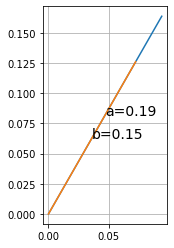

In [245]:
a = [0.0938311688, 0.1637735849]
b = [0.0722077922, 0.1260377358]

def plot_vectors(**kwargs):
  M = []
  for key, value in kwargs.items():
    M.append(list([key]) + list(value))

  ax = plt.axes()
  ax.grid(b=True, which='major')

  for i in range(len(M)):
    l = 0

    for j in range(1, len(M[i])):
      l += M[i][j]**2

    l = l**0.5
    ax.text(M[i][1]/2, M[i][2]/2, f"{M[i][0]}={l:.2f}", size=14)
    ax.plot([0,M[i][1]], [0,M[i][2]])

  ax.set_aspect('equal', 'box')

plot_vectors(a=a, b=b)